In [90]:
import pandas as pd
import numpy as np
import os
df = pd.read_csv('result_series2.csv')

# df.columns = ['nan','file_name','label_1','label2','label3','pred1','pred2','pred3','pred4','pred5']
df.columns = ['nan','file_name','label_1','label2','label3','pred1','pred2','pred3','prob1','prob2','prob3']


# df2=df.sort_values(by=['file_name'], axis=0,ignore_index=True)


In [91]:
file_list = df['file_name'].values.tolist()


In [92]:
id_list=[]
for name in file_list:
    idx1, idx2=0,0
    file_name = name.split('/')
    idx1 = format(int(file_name[2].replace('getMedia','')),'03')
    idx2 = format(int(file_name[3].replace("frame",'').replace('.png','')),'04')
    idx = str(idx1) + str(idx2)
    id_list.append(int(idx))


In [93]:
print(len(id_list))
df['id']=id_list


23909


In [94]:
df2 = df.sort_values(by=['id'],axis=0)
df2 = df2.reset_index(drop=True)
df2

,nan,file_name,label_1,label2,label3,pred1,pred2,pred3,prob1,prob2,prob3,id
0,10274,video/frame/getMedia1/frame0.png,6,getMedia1,5,street,ambulance,living_room,0.973797,0.010123,0.008447,10000
1,10342,video/frame/getMedia1/frame1.png,6,getMedia1,5,street,ambulance,bedroom,0.960600,0.016974,0.014909,10001
2,9229,video/frame/getMedia1/frame2.png,6,getMedia1,5,street,bedroom,living_room,0.926592,0.029138,0.024135,10002
3,10407,video/frame/getMedia1/frame3.png,6,getMedia1,5,street,living_room,bedroom,0.959759,0.019452,0.012713,10003
4,9421,video/frame/getMedia1/frame4.png,6,getMedia1,5,street,living_room,bedroom,0.943813,0.019726,0.018323,10004
...,...,...,...,...,...,...,...,...,...,...,...,...
23904,5228,video/frame/getMedia19/frame466.png,15,getMedia19,5,street,living_room,bedroom,0.909035,0.060313,0.030038,190466
23905,5174,video/frame/getMedia19/frame467.png,15,getMedia19,5,street,bedroom,living_room,0.796782,0.112605,0.090231,190467
23906,5440,video/frame/getMedia19/frame468.png,15,getMedia19,4,living_room,street,bedroom,0.522237,0.401523,0.075976,190468
23907,5225,video/frame/getMedia19/frame469.png,15,getMedia19,5,street,living_room,bedroom,0.559520,0.436204,0.003958,190469


In [97]:
# for i in range(len(id_list)):
#     if df['pred1'][i]=='living_room' or df['pred1'][i]=='bedroom' :
        
#     elif 

In [112]:
video_list=df['label2'].unique()
print(video_list)
for name in video_list:
    globals()['list_{}'.format(name)] = []
    globals()['list_pred_{}'.format(name)] = []
    globals()['list_pred2_{}'.format(name)] = []
    globals()['list_prob_{}'.format(name)] = []
    globals()['list_pred_final_{}'.format(name)] = []
    for i in range(len(id_list)) :
        if df2['label2'][i]==name:
            
            globals()['list_{}'.format(name)].append(df2['id'][i])    
            globals()['list_pred_{}'.format(name)].append(df2['pred1'][i])    
            globals()['list_pred2_{}'.format(name)].append(df2['pred2'][i])
            globals()['list_prob_{}'.format(name)].append(df2['prob1'][i])    
            if df2['pred1'][i]=='living_room' or df2['pred1'][i]=='bedroom' :
                globals()['list_pred_final_{}'.format(name)].append('home')
            else :
                globals()['list_pred_final_{}'.format(name)].append(df2['pred1'][i])



['getMedia12' 'getMedia17' 'getMedia2' 'getMedia5' 'getMedia19'
 'getMedia9' 'getMedia16' 'getMedia8' 'getMedia7' 'getMedia18' 'getMedia1'
 'getMedia13' 'getMedia10' 'getMedia3' 'getMedia14' 'getMedia15'
 'getMedia4']


In [113]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc

In [114]:
print(len(list_pred_final_getMedia1))
print(len(list_pred_getMedia1))

1490
1490


In [139]:
# patience = 4
# check_location = []
# list_idx = []
# for idx in range(patience, len(list_getMedia1)):
#     if len(set(list_pred_final_getMedia1[idx-patience:idx]))==1:
#         list_idx.append(idx)
#         check_location.append(list_pred_final_getMedia1[idx-1])
# x3 = np.array(list_idx)
# y3 = np.array(check_location)
# x1=np.array(list_getMedia1)
# y1=np.array(list_prob_getMedia1)
# z1=np.array(list_pred_final_getMedia1)
# z2=np.array(list_pred2_getMedia1)
# truth_list = []
# for i in range(len(list_getMedia1)):
#     truth_list.append('ambulance')
# truth = np.array(truth_list)

# n=len(list_getMedia1)
# X=range(n)


# plt.figure(figsize=(20, 10))

# plt.subplot(2,1,1)
# plt.title('Media 8', fontsize=35)
# plt.ylim(0,1)
# plt.plot(X[:], y1[:],'-b')
# plt.subplot(2,1,2)
# plt.plot(X[:], z1[:],'.r',label = 'prediction(frame)')
# plt.plot(x3, y3[:],'--g',label = 'prediction(change)')
# plt.plot(X[:], truth[:],'-k',label = 'ground truth')
# plt.legend()
# plt.tight_layout()
# if not os.path.exists('result_graph'):
#     os.makedirs('result_graph')   
# plt.savefig('result_graph/'+'result_fig_'+'media8'+'.png',dpi=100)

In [142]:
# patience = 4
# check_location = []
# list_idx = []
# for idx in range(patience, len(list_getMedia2)):
#     if len(set(list_pred_final_getMedia2[idx-patience:idx]))==1:
#         list_idx.append(idx)
#         check_location.append(list_pred_final_getMedia2[idx-1])
# x3 = np.array(list_idx)
# y3 = np.array(check_location)
# x1=np.array(list_getMedia2)
# y1=np.array(list_prob_getMedia2)
# z1=np.array(list_pred_final_getMedia2)
# z2=np.array(list_pred2_getMedia2)
# truth_list = []
# for i in range(len(list_getMedia2)):
#     truth_list.append('street')
# truth = np.array(truth_list)

# n=len(list_getMedia2)
# X=range(n)


# plt.figure(figsize=(20, 10))

# plt.subplot(2,1,1)
# plt.title('Media 2', fontsize=35)
# plt.ylim(0,1)
# plt.plot(X[:], y1[:],'-b')
# plt.subplot(2,1,2)
# plt.plot(X[:], z1[:],'.r',label = 'prediction(frame)')
# plt.plot(x3, y3[:],'--g',label = 'prediction(change)')
# plt.plot(X[:], truth[:],'-k',label = 'ground truth')
# plt.legend()
# plt.tight_layout()
# if not os.path.exists('result_graph'):
#     os.makedirs('result_graph')   
# plt.savefig('result_graph/'+'result_fig_'+'media8'+'.png',dpi=100)

In [141]:
# x1=np.array(list_getMedia4)
# y1=np.array(list_prob_getMedia4)
# z1=np.array(list_pred_final_getMedia4)
# z2=np.array(list_pred2_getMedia4)
# n=len(list_getMedia4)
# X=range(n)

# plt.figure(figsize=(20, 10))

# plt.subplot(2,1,1)
# plt.ylim(0,1)
# plt.plot(X[:], y1[:],'-b')
# plt.subplot(2,1,2)
# plt.plot(X[:], z1[:],'.r')

In [147]:
# patience = 20
# check_location = []
# list_idx = []
# for idx in range(patience, len(list_getMedia5)):
#     if len(set(list_pred_final_getMedia5[idx-patience:idx]))==1:
#         list_idx.append(idx)
#         check_location.append(list_pred_final_getMedia5[idx-1])
# x3 = np.array(list_idx)
# y3 = np.array(check_location)
# x1=np.array(list_getMedia5)
# y1=np.array(list_prob_getMedia5)
# z1=np.array(list_pred_final_getMedia5)
# z2=np.array(list_pred2_getMedia5)
# truth_list = []
# for i in range(len(list_getMedia5)):
#     truth_list.append('ambulance')
# truth = np.array(truth_list)

# n=len(list_getMedia5)
# X=range(n)


# plt.figure(figsize=(20, 10))

# plt.subplot(2,1,1)
# plt.title('Media 8', fontsize=35)
# plt.ylim(0,1)
# plt.plot(X[:], y1[:],'-b')
# plt.subplot(2,1,2)
# plt.plot(X[:], z1[:],'.r',label = 'prediction(frame)')
# plt.plot(x3, y3[:],'--g',label = 'prediction(change)')
# plt.plot(X[:], truth[:],'-k',label = 'ground truth')
# plt.legend()
# plt.tight_layout()
# if not os.path.exists('result_graph'):
#     os.makedirs('result_graph')   
# plt.savefig('result_graph/'+'result_fig_'+'media8'+'.png',dpi=100)

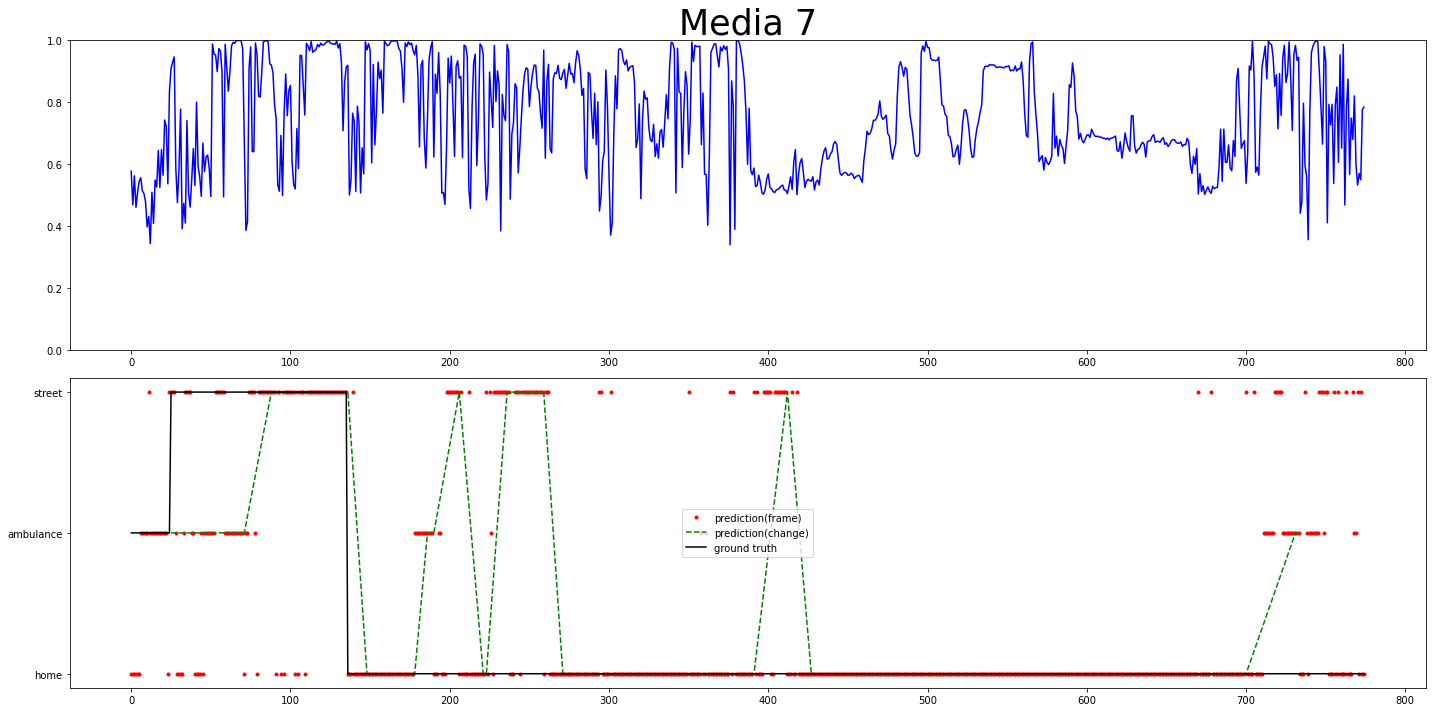

In [184]:
patience = 8
check_location = []
list_idx = []
for idx in range(patience, len(list_getMedia7)):
    if len(set(list_pred_final_getMedia7[idx-patience:idx]))==1:
        list_idx.append(idx)
        check_location.append(list_pred_final_getMedia7[idx-1])
x3 = np.array(list_idx)
y3 = np.array(check_location)
x1=np.array(list_getMedia7)
y1=np.array(list_prob_getMedia7)
z1=np.array(list_pred_final_getMedia7)
z2=np.array(list_pred2_getMedia7)
truth_list = []
for i in range(len(list_getMedia7)):
    if i < 25 : 
        truth_list.append('ambulance')
    elif i < 136: 
        truth_list.append('street')
    else :
        truth_list.append('home')
truth = np.array(truth_list)

n=len(list_getMedia7)
X=range(n)


plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
plt.title('Media 7', fontsize=35)
plt.ylim(0,1)
plt.plot(X[:], y1[:],'-b')
plt.subplot(2,1,2)
plt.plot(X[:], z1[:],'.r',label = 'prediction(frame)')
plt.plot(x3, y3[:],'--g',label = 'prediction(change)')
plt.plot(X[:], truth[:],'-k',label = 'ground truth')
plt.legend()
plt.tight_layout()
if not os.path.exists('result_graph'):
    os.makedirs('result_graph')   
plt.savefig('result_graph/'+'result_fig_'+'media8'+'.png',dpi=100)

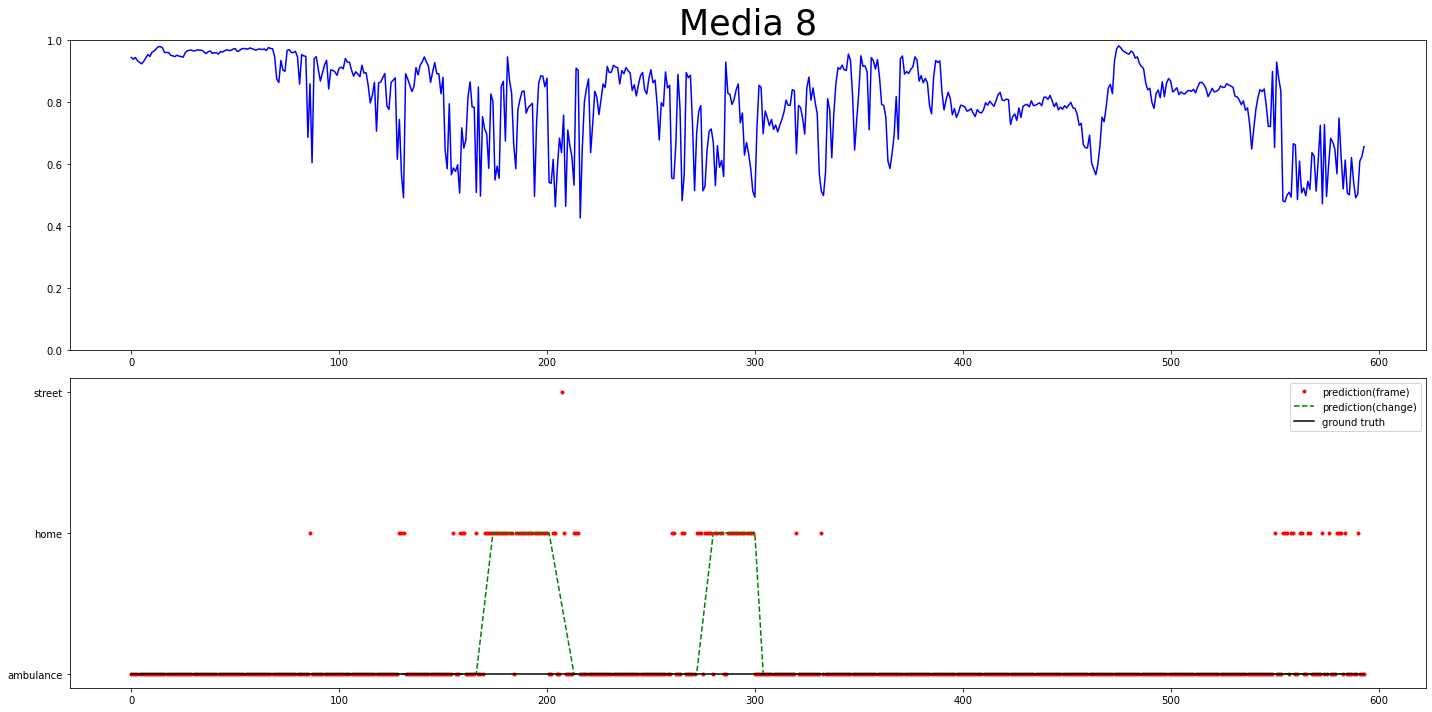

In [185]:
patience = 4
check_location = []
list_idx = []
for idx in range(patience, len(list_getMedia8)):
    if len(set(list_pred_final_getMedia8[idx-patience:idx]))==1:
        list_idx.append(idx)
        check_location.append(list_pred_final_getMedia8[idx-1])
x3 = np.array(list_idx)
y3 = np.array(check_location)
x1=np.array(list_getMedia8)
y1=np.array(list_prob_getMedia8)
z1=np.array(list_pred_final_getMedia8)
z2=np.array(list_pred2_getMedia8)
truth_list = []
for i in range(len(list_getMedia8)):
    truth_list.append('ambulance')
truth = np.array(truth_list)

n=len(list_getMedia8)
X=range(n)


plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
plt.title('Media 8', fontsize=35)
plt.ylim(0,1)
plt.plot(X[:], y1[:],'-b')
plt.subplot(2,1,2)
plt.plot(X[:], z1[:],'.r',label = 'prediction(frame)')
plt.plot(x3, y3[:],'--g',label = 'prediction(change)')
plt.plot(X[:], truth[:],'-k',label = 'ground truth')
plt.legend()
plt.tight_layout()
if not os.path.exists('result_graph'):
    os.makedirs('result_graph')   
plt.savefig('result_graph/'+'result_fig_'+'media8'+'.png',dpi=100)

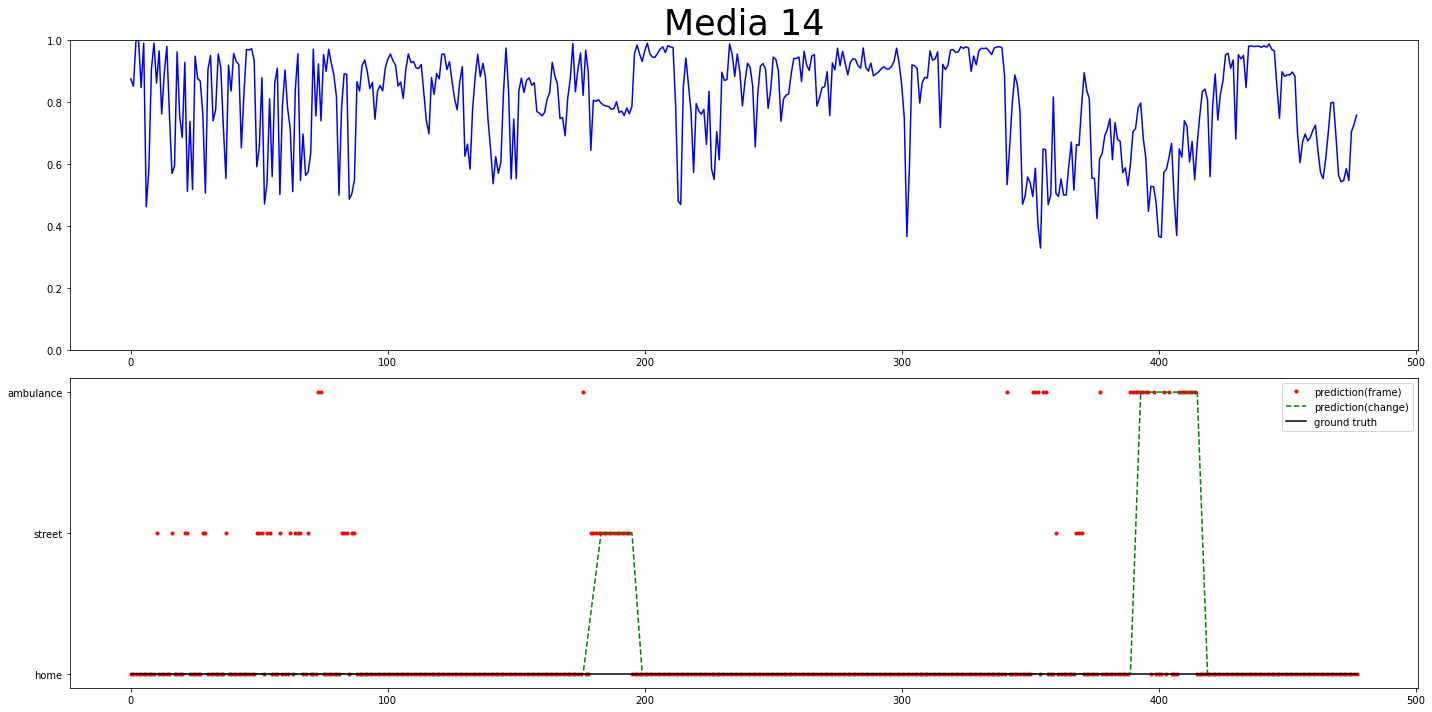

In [128]:
patience = 4
check_location = []
list_idx = []
for idx in range(patience, len(list_getMedia14)):
    if len(set(list_pred_getMedia14[idx-patience:idx]))==1:
        list_idx.append(idx)
        check_location.append(list_pred_final_getMedia14[idx-1])
x3 = np.array(list_idx)
y3 = np.array(check_location)
x1=np.array(list_getMedia14)
y1=np.array(list_prob_getMedia14)
z1=np.array(list_pred_final_getMedia14)
z2=np.array(list_pred2_getMedia14)

truth_list = []
for i in range(len(list_getMedia14)):
    truth_list.append('home')
    
truth = np.array(truth_list)

n=len(list_getMedia14)
X=range(n)

plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
plt.title('Media 14', fontsize=35)
plt.ylim(0,1)
plt.plot(X[:], y1[:],'-b')
plt.subplot(2,1,2)
plt.plot(X[:], z1[:],'.r',label = 'prediction(frame)')
plt.plot(x3, y3[:],'--g',label = 'prediction(change)')
plt.plot(X[:], truth[:],'-k',label = 'ground truth')
plt.legend()
plt.tight_layout()
if not os.path.exists('result_graph'):
    os.makedirs('result_graph')   
plt.savefig('result_graph/'+'result_fig_'+'media14'+'.png',dpi=100)

/home/hoyin/anaconda3/envs/solaris2/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


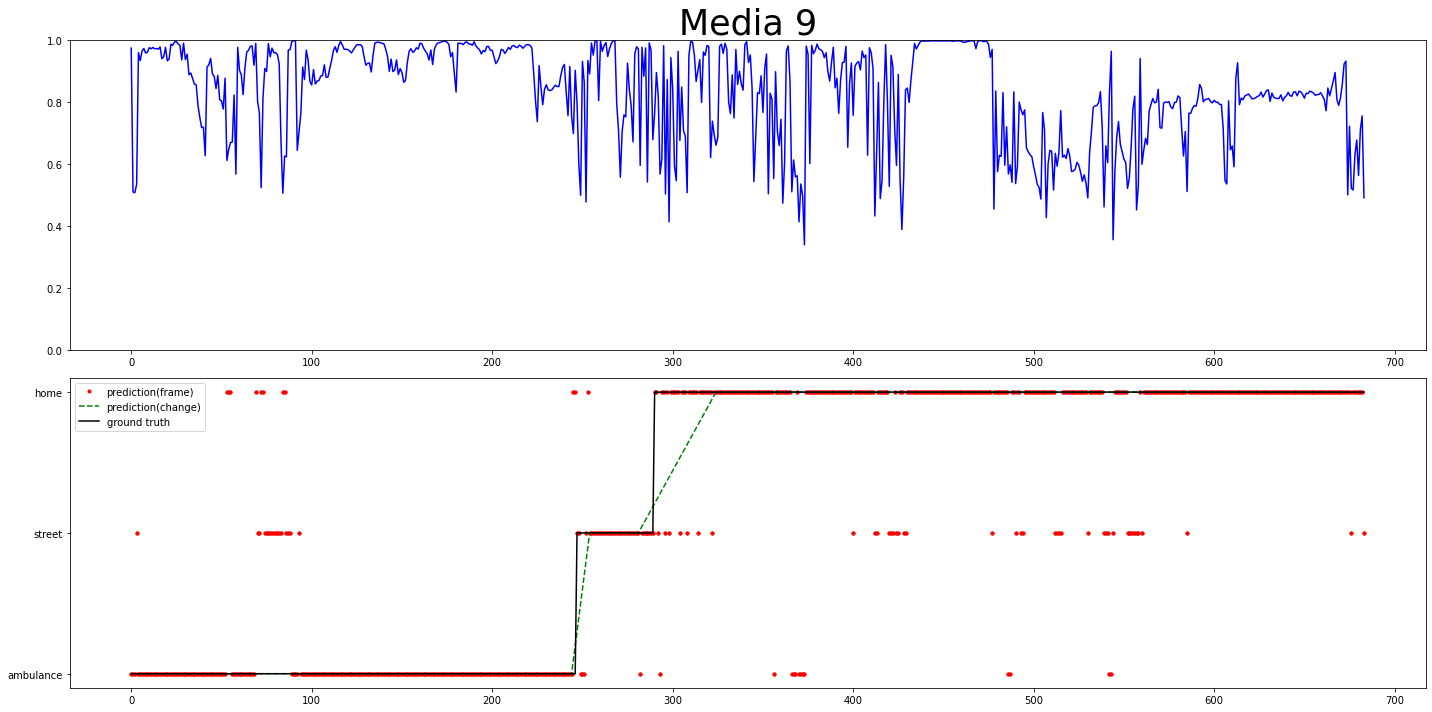

In [187]:
patience = 15
check_location = []
list_idx = []
for idx in range(patience, len(list_getMedia9)):
    if len(set(list_pred_getMedia9[idx-patience:idx]))==1:
        
#         list_idx.append(idx)
#         check_location.append(list_pred_getMedia9[idx-1])
        for i in range(patience):
            list_idx.append(idx-patience+i)
            check_location.append(list_pred_final_getMedia9[idx-patience+i])
        
x3 = np.array(list_idx)
y3 = np.array(check_location)
x1=np.array(list_getMedia9)
y1=np.array(list_prob_getMedia9)
z1=np.array(list_pred_final_getMedia9)
z2=np.array(list_pred2_getMedia9)

truth_list = []
for i in range(len(list_getMedia9)):
    if i < 247 : 
        truth_list.append('ambulance')
    elif i < 290: 
        truth_list.append('street')
    else :
        truth_list.append('home')
truth = np.array(truth_list)
        
n=len(list_getMedia9)
X=range(n)


plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
plt.title('Media 9', fontsize=35)
plt.ylim(0,1)
plt.plot(X[:], y1[:],'-b')
plt.subplot(2,1,2)
plt.plot(X[:], z1[:],'.r')
plt.subplot(2,1,2)
plt.plot(X[:], z1[:],'.r',label = 'prediction(frame)')
plt.plot(x3, y3[:],'--g',label = 'prediction(change)')
plt.plot(X[:], truth[:],'-k',label = 'ground truth')
plt.legend()
plt.tight_layout()
if not os.path.exists('result_graph'):
    os.makedirs('result_graph')   
plt.savefig('result_graph/'+'result_fig_'+'media9'+'.png',dpi=100)

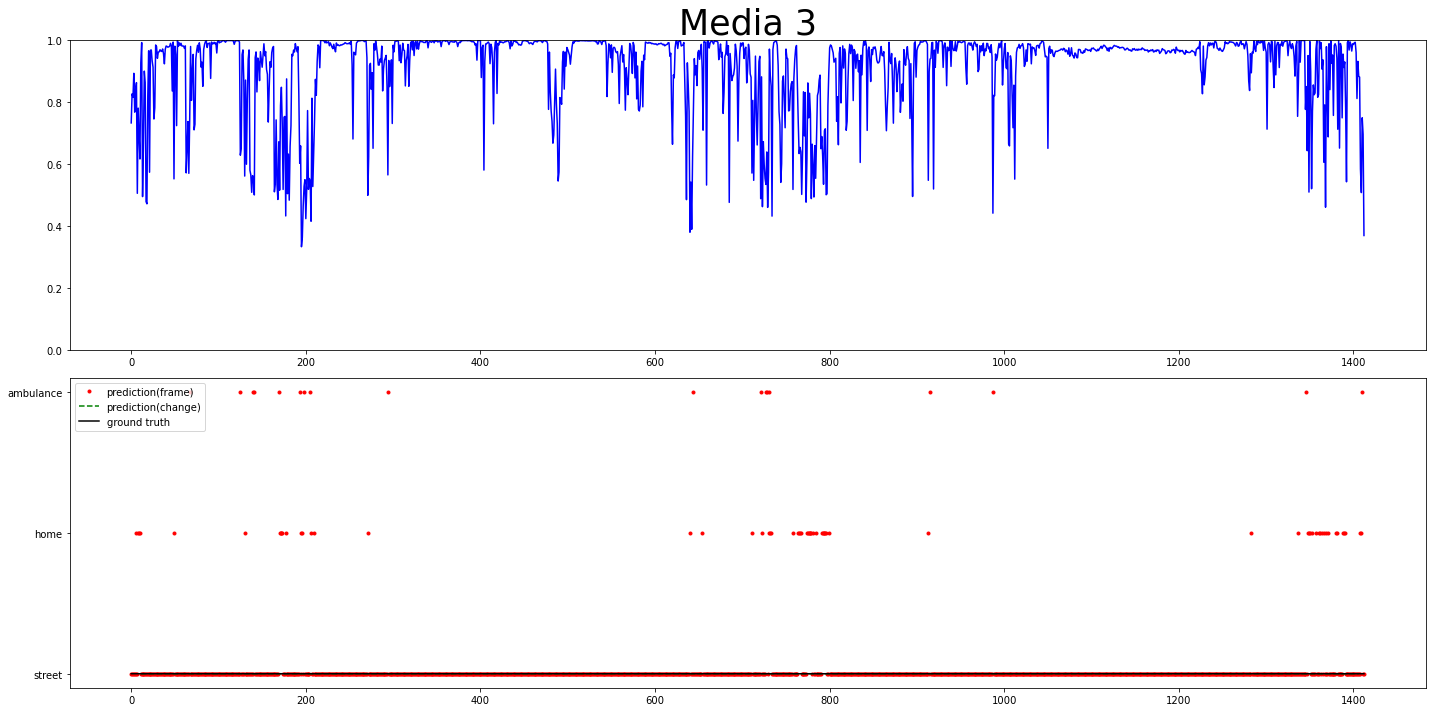

In [165]:
patience = 10
check_location = []
list_idx = []
for idx in range(patience, len(list_getMedia3)):
    if len(set(list_pred_getMedia3[idx-patience:idx]))==1:
#         list_idx.append(idx)
#         check_location.append(list_pred_getMedia3[idx-1])
        for i in range(patience):
            list_idx.append(idx-patience+i)
            check_location.append(list_pred_final_getMedia3[idx-patience+i])
x3 = np.array(list_idx)
y3 = np.array(check_location)
x1=np.array(list_getMedia3)

truth_list = []
for i in range(len(list_getMedia3)):
    truth_list.append('street')
    
truth = np.array(truth_list)

y1=np.array(list_prob_getMedia3)
z1=np.array(list_pred_final_getMedia3)
z2=np.array(list_pred2_getMedia3)


n=len(list_getMedia3)
X=range(n)

plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
plt.title('Media 3', fontsize=35)
plt.ylim(0,1)
plt.plot(X[:], y1[:],'-b')
plt.subplot(2,1,2)

plt.plot(X[:], z1[:],'.r',label = 'prediction(frame)')
plt.plot(x3, y3[:],'--g',label = 'prediction(change)')
plt.plot(X[:], truth[:],'-k',label = 'ground truth')
plt.legend()
plt.tight_layout()
if not os.path.exists('result_graph'):
    os.makedirs('result_graph')   
plt.savefig('result_graph/'+'result_fig_'+'media3'+'.png',dpi=100)

/home/hoyin/anaconda3/envs/solaris2/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


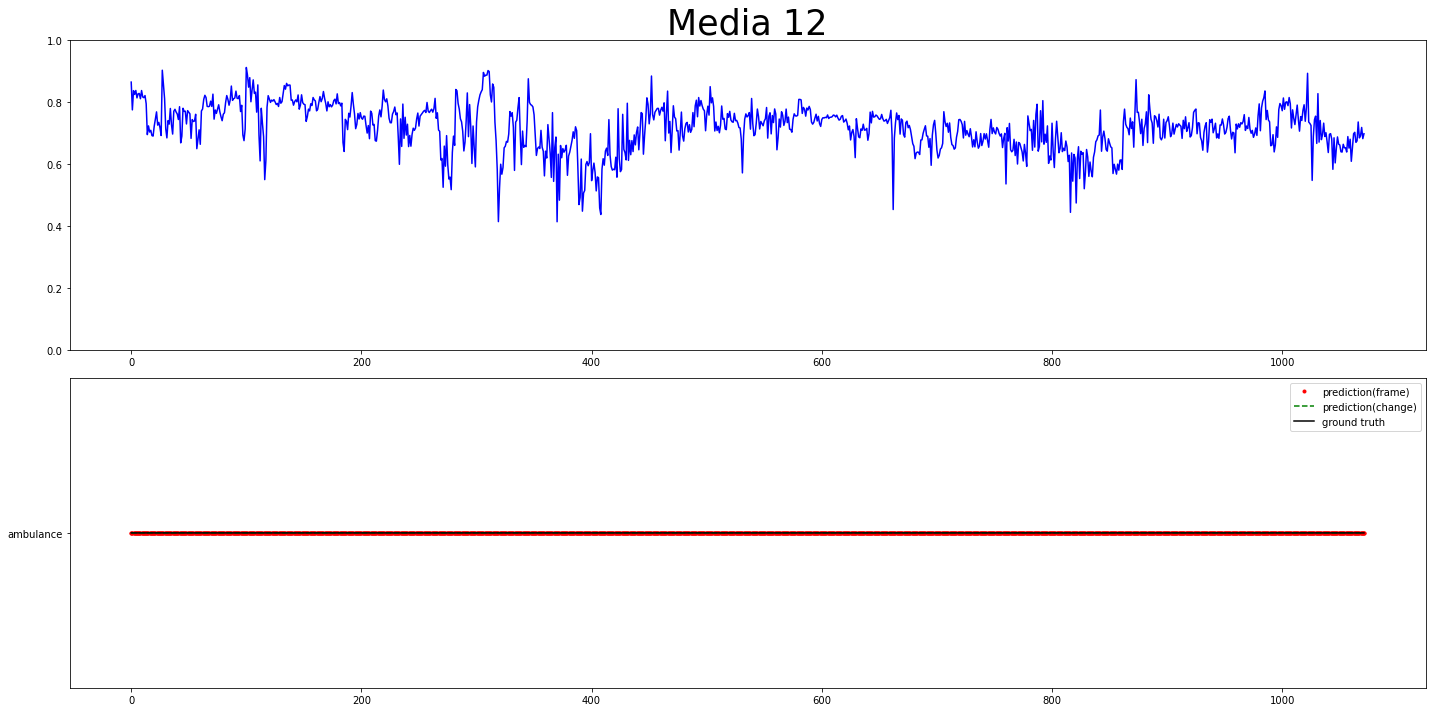

In [181]:
patience = 10
check_location = []
list_idx = []
for idx in range(patience, len(list_getMedia15)):
    if len(set(list_pred_getMedia15[idx-patience:idx]))==1:
        
#         list_idx.append(idx)
#         check_location.append(list_pred_getMedia9[idx-1])
        for i in range(patience):
            list_idx.append(idx-patience+i)
            check_location.append(list_pred_final_getMedia15[idx-patience+i])
        
x3 = np.array(list_idx)
y3 = np.array(check_location)
x1=np.array(list_getMedia15)
y1=np.array(list_prob_getMedia15)
z1=np.array(list_pred_final_getMedia15)
z2=np.array(list_pred2_getMedia15)

truth_list = []
for i in range(len(list_getMedia15)):
    truth_list.append('ambulance')
    
truth = np.array(truth_list)
        
n=len(list_getMedia15)
X=range(n)


plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
plt.title('Media 12', fontsize=35)
plt.ylim(0,1)
plt.plot(X[:], y1[:],'-b')
plt.subplot(2,1,2)
plt.plot(X[:], z1[:],'.r')
plt.subplot(2,1,2)
plt.plot(X[:], z1[:],'.r',label = 'prediction(frame)')
plt.plot(x3, y3[:],'--g',label = 'prediction(change)')
plt.plot(X[:], truth[:],'-k',label = 'ground truth')
plt.legend()
plt.tight_layout()
if not os.path.exists('result_graph'):
    os.makedirs('result_graph')   
plt.savefig('result_graph/'+'result_fig_'+'media9'+'.png',dpi=100)

In [370]:
# x1=np.array(list_getMedia19)
# y1=np.array(list_prob_getMedia19)
# z1=np.array(list_pred_getMedia19)
# z2=np.array(list_pred2_getMedia19)
# n=len(list_getMedia19)
# X=range(n)

# plt.figure(figsize=(20, 10))
# plt.title('Media 19', fontsize=35)
# plt.subplot(2,1,1)
# plt.ylim(0,1)
# plt.plot(X[:], y1[:],'-b')
# plt.subplot(2,1,2)
# plt.plot(X[:], z1[:],'.r')

In [169]:
# patience = 6
# check_location = []
# list_idx = []
# for idx in range(patience, len(list_getMedia10)):
#     if len(set(list_pred_getMedia10[idx-patience:idx]))==1:
        
# #         list_idx.append(idx)
# #         check_location.append(list_pred_getMedia9[idx-1])
#         for i in range(patience):
#             list_idx.append(idx-patience+i)
#             check_location.append(list_pred_final_getMedia10[idx-patience+i])
        
# x3 = np.array(list_idx)
# y3 = np.array(check_location)
# x1=np.array(list_getMedia10)
# y1=np.array(list_prob_getMedia10)
# z1=np.array(list_pred_final_getMedia10)
# z2=np.array(list_pred2_getMedia10)

# truth_list = []
# for i in range(len(list_getMedia10)):
#     if i < 247 : 
#         truth_list.append('ambulance')
#     elif i < 290: 
#         truth_list.append('street')
#     else :
#         truth_list.append('home')
# truth = np.array(truth_list)
        
# n=len(list_getMedia10)
# X=range(n)


# plt.figure(figsize=(20, 10))

# plt.subplot(2,1,1)
# plt.title('Media 9', fontsize=35)
# plt.ylim(0,1)
# plt.plot(X[:], y1[:],'-b')
# plt.subplot(2,1,2)
# plt.plot(X[:], z1[:],'.r')
# plt.subplot(2,1,2)
# plt.plot(X[:], z1[:],'.r',label = 'prediction(frame)')
# plt.plot(x3, y3[:],'--g',label = 'prediction(change)')
# plt.plot(X[:], truth[:],'-k',label = 'ground truth')
# plt.legend()
# plt.tight_layout()
# if not os.path.exists('result_graph'):
#     os.makedirs('result_graph')   
# plt.savefig('result_graph/'+'result_fig_'+'media9'+'.png',dpi=100)

/home/hoyin/anaconda3/envs/solaris2/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


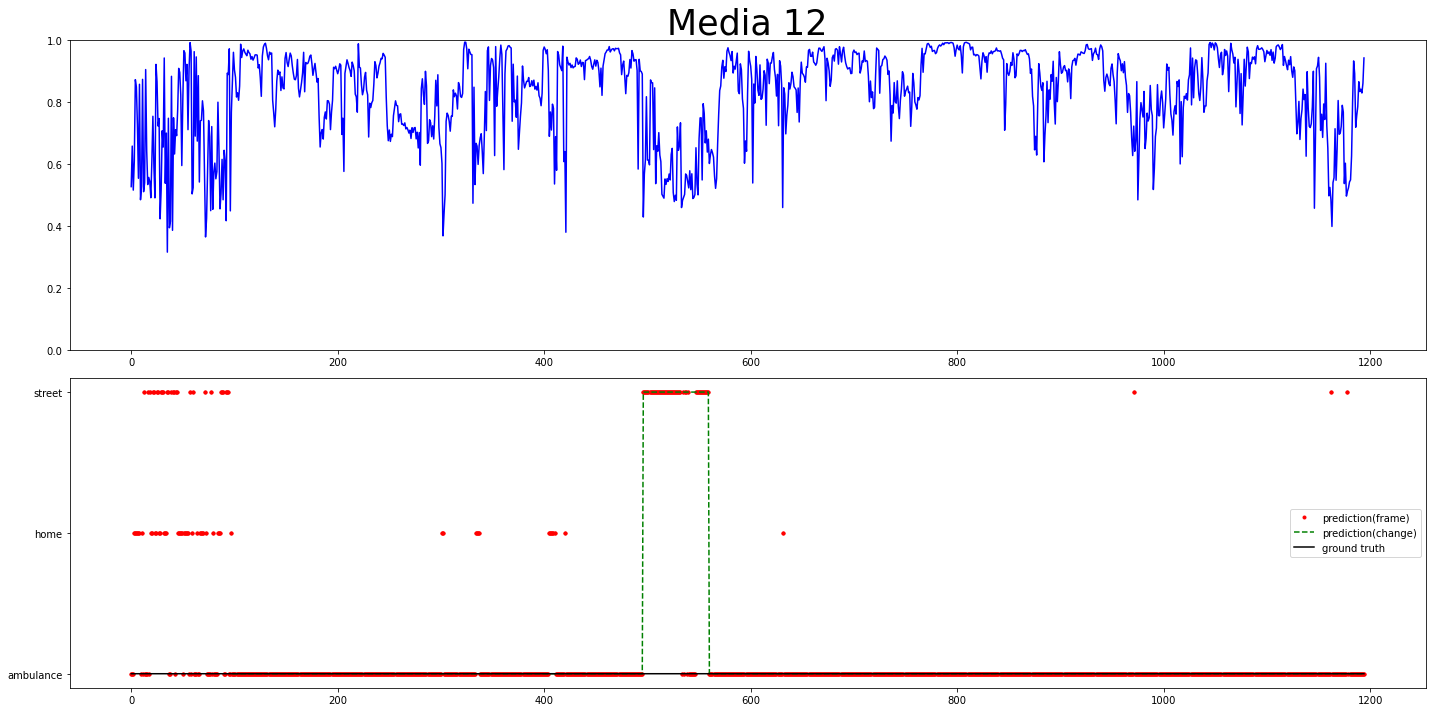

In [174]:
patience = 10
check_location = []
list_idx = []
for idx in range(patience, len(list_getMedia12)):
    if len(set(list_pred_getMedia12[idx-patience:idx]))==1:
        
#         list_idx.append(idx)
#         check_location.append(list_pred_getMedia9[idx-1])
        for i in range(patience):
            list_idx.append(idx-patience+i)
            check_location.append(list_pred_final_getMedia12[idx-patience+i])
        
x3 = np.array(list_idx)
y3 = np.array(check_location)
x1=np.array(list_getMedia12)
y1=np.array(list_prob_getMedia12)
z1=np.array(list_pred_final_getMedia12)
z2=np.array(list_pred2_getMedia12)

truth_list = []
for i in range(len(list_getMedia12)):
    truth_list.append('ambulance')
    
truth = np.array(truth_list)
        
n=len(list_getMedia12)
X=range(n)


plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
plt.title('Media 12', fontsize=35)
plt.ylim(0,1)
plt.plot(X[:], y1[:],'-b')
plt.subplot(2,1,2)
plt.plot(X[:], z1[:],'.r')
plt.subplot(2,1,2)
plt.plot(X[:], z1[:],'.r',label = 'prediction(frame)')
plt.plot(x3, y3[:],'--g',label = 'prediction(change)')
plt.plot(X[:], truth[:],'-k',label = 'ground truth')
plt.legend()
plt.tight_layout()
if not os.path.exists('result_graph'):
    os.makedirs('result_graph')   
plt.savefig('result_graph/'+'result_fig_'+'media9'+'.png',dpi=100)

In [176]:
# x1=np.array(list_getMedia13)
# y1=np.array(list_prob_getMedia13)
# z1=np.array(list_pred_getMedia13)
# z2=np.array(list_pred2_getMedia13)
# n=len(list_getMedia13)
# X=range(n)

# plt.figure(figsize=(20, 10))

# plt.subplot(2,1,1)
# plt.ylim(0,1)
# plt.plot(X[:], y1[:],'-b')
# plt.subplot(2,1,2)
# plt.plot(X[:], z1[:],'.r')

In [364]:
# x1=np.array(list_getMedia14)
# y1=np.array(list_prob_getMedia14)
# z1=np.array(list_pred_getMedia14)
# z2=np.array(list_pred2_getMedia14)
# n=len(list_getMedia14)
# X=range(n)

# plt.figure(figsize=(20, 10))

# plt.subplot(2,1,1)
# plt.ylim(0,1)
# plt.plot(X[:], y1[:],'-b')
# plt.subplot(2,1,2)
# plt.plot(X[:], z1[:],'.r')

/home/hoyin/anaconda3/envs/solaris2/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


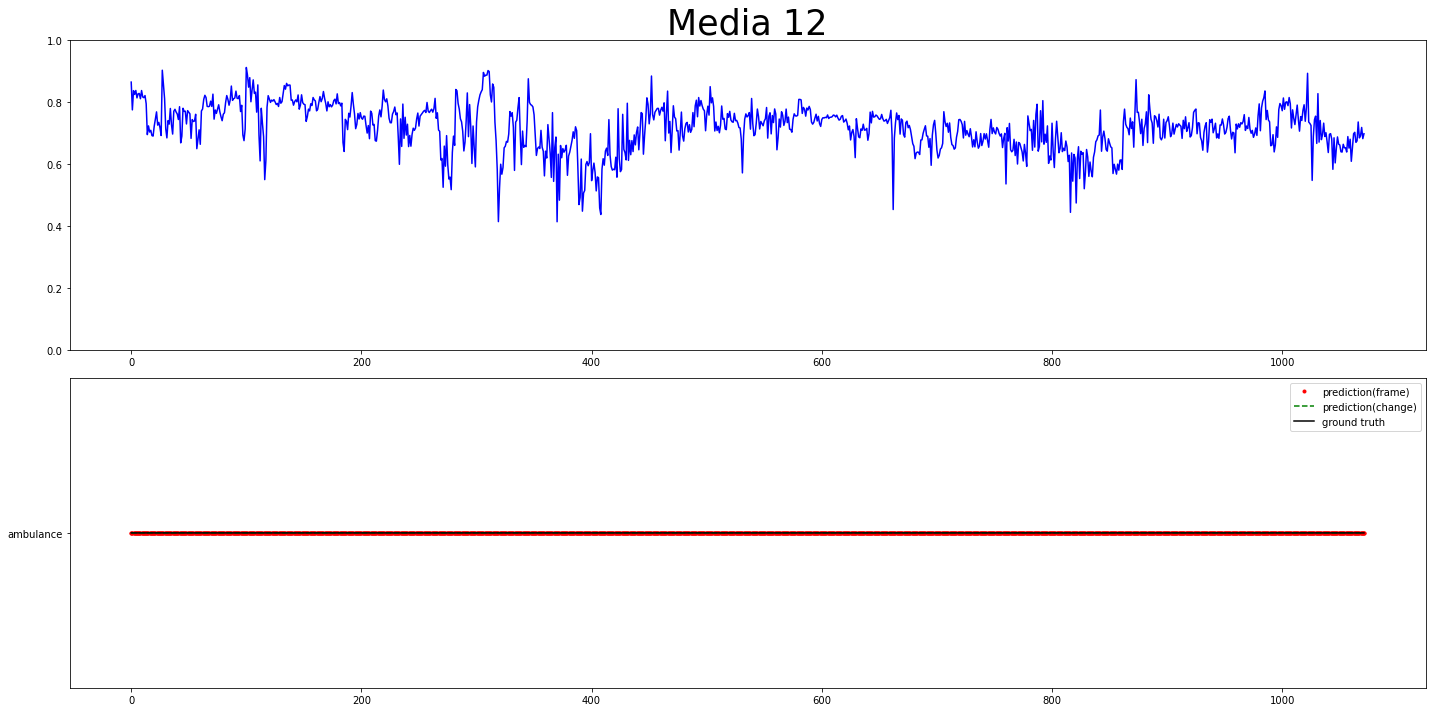

In [180]:
# x1=np.array(list_getMedia18)
# y1=np.array(list_prob_getMedia18)
# z1=np.array(list_pred_getMedia18)
# z2=np.array(list_pred2_getMedia18)
# n=len(list_getMedia18)
# X=range(n)

# plt.figure(figsize=(20, 10))

# plt.subplot(2,1,1)
# plt.ylim(0,1)
# plt.plot(X[:], y1[:],'-b')
# plt.subplot(2,1,2)
# plt.plot(X[:], z1[:],'.r')